## Import Libraries

In [1]:
#Import libraries
import sys
import json
import os
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_json('logins.json')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data_sort=data.sort_values(by='login_time',ascending=True)

In [5]:
data_sort

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
...,...
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93141,1970-04-13 18:54:23


In [6]:
 data.columns

Index(['login_time'], dtype='object')

In [7]:
# load json as string
login_data = json.load((open('logins.json')))
#print(type(login_data))
login_data['login_time'][:5]

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21']

In [8]:
login_df = pd.read_json('logins.json')
login_df['value'] = 1
display(login_df.head())
print(login_df.shape)
print(type(login_df['login_time']))

,login_time,value
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


(93142, 2)
<class 'pandas.core.series.Series'>


In [9]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   value       93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


## Aggregate Login time counts within every 15 minute time intervals

In [10]:
from itertools import groupby
from datetime import datetime, timedelta

def get_key(t):
# group by 15 minutes
    k = t + timedelta(minutes=-(t.minute % 15))
    return datetime(k.year, k.month, k.day, k.hour, k.minute, 0)



In [11]:
g = groupby(sorted(login_df['login_time']), key=get_key)
aggregateTimeIntervalList = []
aggregated_len = []
#test=groupby(sorted(login_df['login_time'][:10]), key=get_key)
#test
#sorted(login_df['login_time'][:10])
for key, group in g: 
    length = len(list(group))
    #print(key, list(group), type(list(group)), length)
    aggregateTimeIntervalList.append(str(key))
    aggregated_len.append(length)
print(aggregated_len[:20])
print(aggregateTimeIntervalList[:20])

[2, 6, 9, 7, 1, 4, 4, 9, 8, 1, 3, 16, 13, 14, 15, 10, 18, 12, 13, 9]
['1970-01-01 20:00:00', '1970-01-01 20:15:00', '1970-01-01 20:30:00', '1970-01-01 20:45:00', '1970-01-01 21:00:00', '1970-01-01 21:15:00', '1970-01-01 21:45:00', '1970-01-01 22:00:00', '1970-01-01 22:15:00', '1970-01-01 22:30:00', '1970-01-01 22:45:00', '1970-01-01 23:00:00', '1970-01-01 23:15:00', '1970-01-01 23:30:00', '1970-01-01 23:45:00', '1970-01-02 00:00:00', '1970-01-02 00:15:00', '1970-01-02 00:30:00', '1970-01-02 00:45:00', '1970-01-02 01:00:00']


In [12]:
series = pd.DataFrame(aggregateTimeIntervalList)
#print(series.columns)
series = series.rename(columns={0:'Time_Intervals'})
#series.head()
series['counts'] = pd.Series(aggregated_len)
display(series.head())
print(series.shape)
display(series.tail())

,Time_Intervals,counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


(9381, 2)


,Time_Intervals,counts
9376,1970-04-13 17:45:00,5
9377,1970-04-13 18:00:00,5
9378,1970-04-13 18:15:00,2
9379,1970-04-13 18:30:00,7
9380,1970-04-13 18:45:00,6


## Visualization

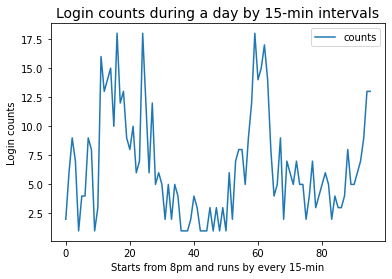

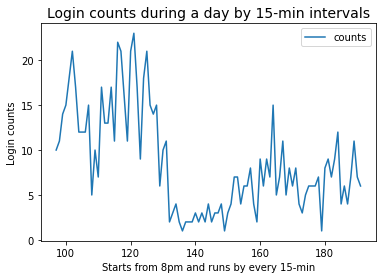

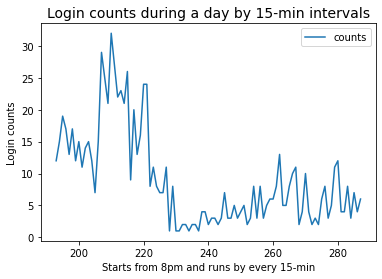

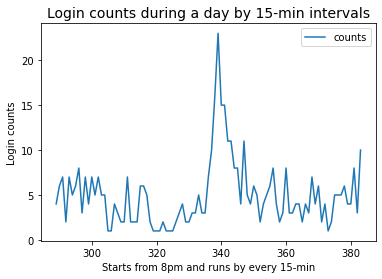

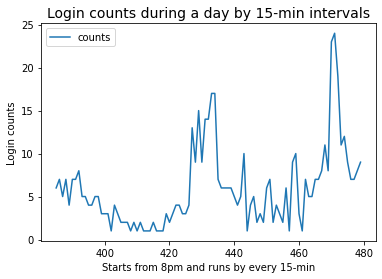

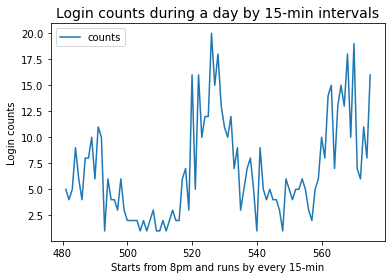

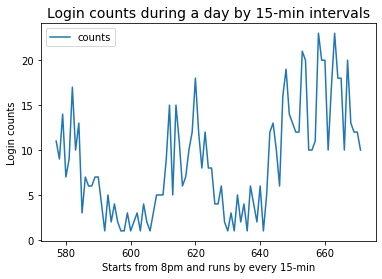

In [13]:
import matplotlib.pyplot as plt
series[:96].plot()
plt.ylabel('Login counts')
plt.xlabel('Starts from 8pm and runs by every 15-min')
plt.title('Login counts during a day by 15-min intervals',fontsize=14)
for i in range(6):
    series[(96*(i+1)+1):96*(i+2)].plot()
    plt.ylabel('Login counts')
    plt.xlabel('Starts from 8pm and runs by every 15-min')
    plt.title('Login counts during a day by 15-min intervals',fontsize=14)



Text(0.5, 1.0, 'Login counts during a week by 15-min intervals')

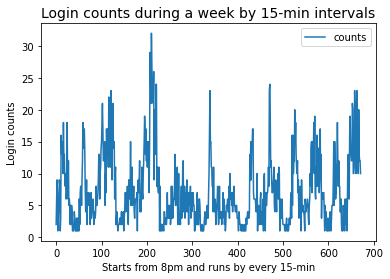

In [14]:
series[:96*7].plot()
plt.ylabel('Login counts')
plt.xlabel('Starts from 8pm and runs by every 15-min')
plt.title('Login counts during a week by 15-min intervals',fontsize=14)

Text(0.5, 1.0, 'Login counts during a month by 15-min intervals')

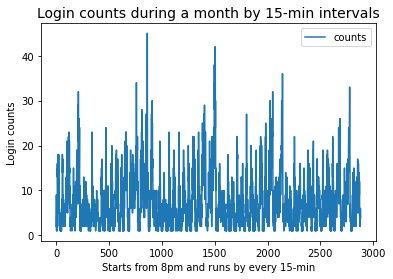

In [15]:
series[:96*30].plot()
plt.ylabel('Login counts')
plt.xlabel('Starts from 8pm and runs by every 15-min')
plt.title('Login counts during a month by 15-min intervals',fontsize=14)

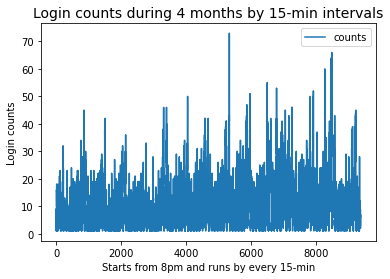

In [16]:
series.plot()
plt.ylabel('Login counts')
plt.xlabel('Starts from 8pm and runs by every 15-min')
plt.title('Login counts during 4 months by 15-min intervals',fontsize=14)
plt.show()

## Observations from the graphs:


From the Login counts per day graph we can observe 2 peak login times during weekdays, one is around 5pm to 8pm in the evenings, the other is around 8am in the morning. As it gets closer to weekends, such as Friday, Saturday and Sunday, the peak time shifts approximately to 10am-1pm during the day, and 10pm to 1am during the night.
The pattern seen from the login counts per week graph is that Saturday login counts are generally higher than weekdays and Sundays, and the pattern is repeated every week.